In [90]:
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

import seaborn as sns

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#To Test Simple Linear Regression --> Create sample test data for weight and height 

filename = "height_weight_dataset.csv"
BASE_DIR = os.getcwd()
CONFIG_PATH = os.path.join(BASE_DIR, "","test_data", filename)

print("BASE_DIR:", BASE_DIR)
print("CONFIG_PATH:", CONFIG_PATH)


# Delete old CSV if it exists
if os.path.exists(CONFIG_PATH):
    os.remove(CONFIG_PATH)
    print(f"Old file '{CONFIG_PATH}' deleted.")

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic height data (in cm)
heights = np.random.normal(loc=170, scale=10, size=500)
heights = np.clip(heights, 140, 200)

# Generate weight using a linear model with noise
a = 0.9
noise = np.random.normal(loc=0, scale=10, size=500)
weights = a * heights + noise
weights = np.clip(weights, 40, 150)

# Create DataFrame
df = pd.DataFrame({
    "Weight": weights.round(1),
    "Height": heights.round(1)
})

# Save to CSV
df.to_csv(CONFIG_PATH, index=False)

print(f"New file '{CONFIG_PATH}' has been created with 500 samples.")

BASE_DIR: /Users/sankar_admin/ML_Learning/ml_testing/simple_linear_regression
CONFIG_PATH: /Users/sankar_admin/ML_Learning/ml_testing/simple_linear_regression/test_data/height_weight_dataset.csv
New file '/Users/sankar_admin/ML_Learning/ml_testing/simple_linear_regression/test_data/height_weight_dataset.csv' has been created with 500 samples.


In [67]:
# Simple Linear Regression
##REad the dataset
# df=pd.read_csv('.//test_data//height-weight.csv')
df.head()

,Weight,Height
0,150.0,175.0
1,150.0,168.6
2,144.8,176.5
3,150.0,185.2
4,144.4,167.7


Text(0, 0.5, 'Height')

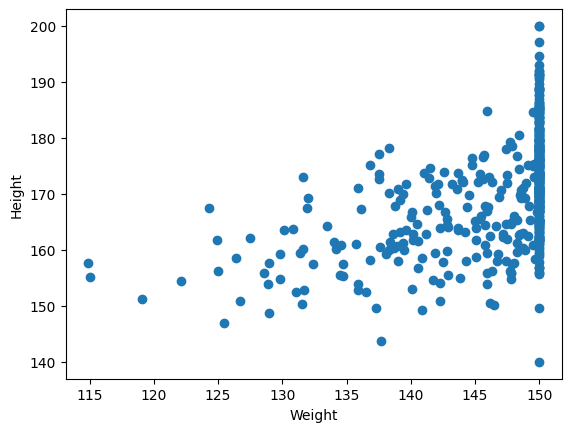

In [68]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [69]:
##divide our dataset into independent and dependent features
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
print("y_train ==>", y_train)
print("X_train ==>", X_train)

y_train ==> 12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64
X_train ==>     Weight
12     105
1       58
13     100
5       78
2       48
11      95
20      45
3       60
4       70
18      76
16      50
21      56
22      72
7       90
10      82
14      85
19      87
6       80


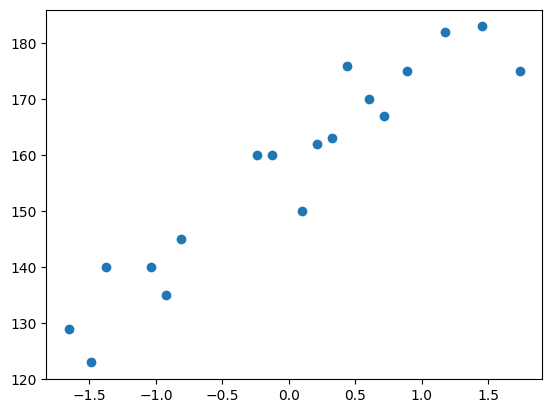

In [70]:
## Standardize the dataset
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
plt.scatter(X_train,y_train)

In [71]:
regressor=LinearRegression()
regressor
type(X_train)
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)
y_train.shape
regressor.fit(X_train,y_train)
## coefficient and intercepts
print("Coefficient : ",regressor.coef_)
print("Intercept : ",regressor.intercept_)

Coefficient :  [17.03440872]
Intercept :  157.5


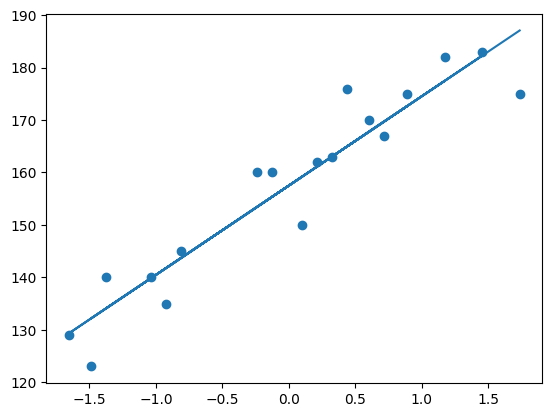

In [72]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =65.4364 + 1.26(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =65.4364 + 1.26(X_test)

In [73]:
y_pred_test=regressor.predict(X_test)
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

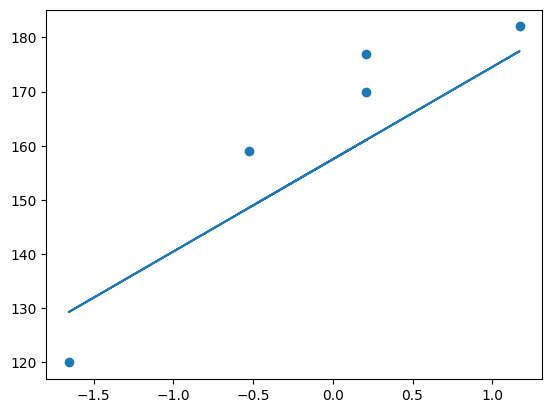

In [74]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test))

In [75]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [76]:
score=r2_score(y_test,y_pred_test)
print(score)

0.776986986042344


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [77]:
score=r2_score(y_test,y_pred_test)
print(score)

0.776986986042344


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [78]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [79]:
regressor.predict(scaler.transform([[75]]))

/Users/sankar_admin/ML_Learning/venv_ml_testing/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([158.19553315])

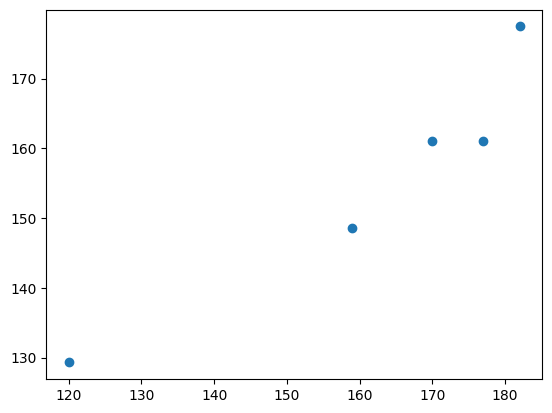

In [80]:
## Assumptions

## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [81]:
## Residuals
residuals=y_test-y_pred_test

residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

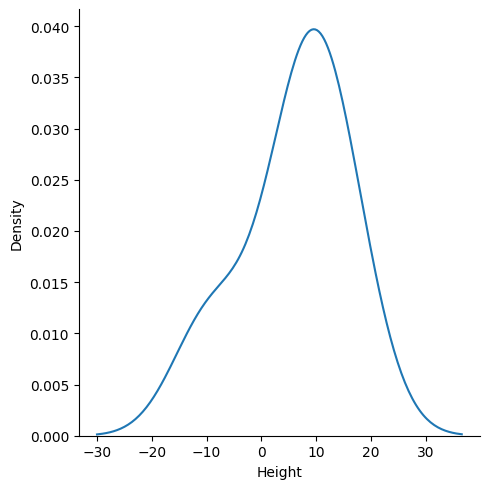

In [82]:
## Plot this residuals 
sns.displot(residuals,kind="kde")

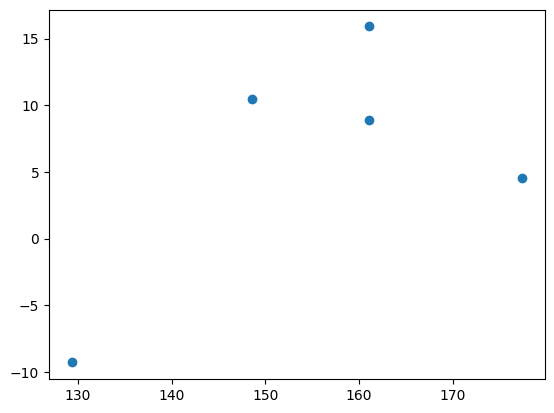

In [83]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)

## Using OLS

In [84]:
import statsmodels.api as sm


model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 
print(model.summary())
regressor.coef_

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Thu, 24 Apr 2025   Prob (F-statistic):                       0.661
Time:                        17:41:49   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/sankar_admin/ML_Learning/venv_ml_testing/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


array([17.03440872])